In [1]:
import numpy as np
import pandas as pd
review_data = pd.read_csv('game_reviews.csv')
review_data.shape

(15000, 9)

In [2]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [3]:
review_data.head (10)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN
5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,Grandson loves,Five Stars,1485475200,NaN
6,5,False,"01 02, 2017",A14J12PRBLGHF4,Amazon Customer,"I have bought many gm screens over the years, ...",Best gm screen ever,1483315200,NaN
7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,Came in perfect condition.,Five Stars,1481932800,NaN
8,4,False,"12 15, 2016",A2ONKKDETRWT79,Consumer Dad,Could be better but its still great. I love th...,Great but could be even better,1481760000,NaN
9,3,True,"12 9, 2016",AK9GN9KZZNTEP,Dallas Gamer Family,My review will mirror others in that this kind...,Another missed opportunity. Not a value add t...,1481241600,['https://images-na.ssl-images-amazon.com/imag...


**Deciding which column to focus:**

* reviewText

**Pre-processing data steps:**

* remove unverified (i.e. 'verified' column is equal to False) comments - (here we are assuming that only verified comments are by our customers) 
* remove blanks
* transform data to lowercase
* remove punctuations
* identify and remove duplicates

In [4]:
# Remove unverified (i.e. 'verified' column is equal to False) comments
review_data.drop(review_data[review_data['verified'] == False].index, inplace = True)
review_data.shape

(13176, 9)

In [5]:
# Remove blanks
review_data.dropna(subset=['reviewText'], inplace = True)
review_data.shape

(13167, 9)

In [6]:
# Transform data to lowercase
review_data['reviewText'] = review_data['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
review_data.head ()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy! bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9's previous screens these w...,Money trap,1486512000,NaN
5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,grandson loves,Five Stars,1485475200,NaN
7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,came in perfect condition.,Five Stars,1481932800,NaN


In [7]:
# Remove punctuations
review_data['reviewText'] = review_data['reviewText'].str.replace('[^\w\s]', '')
review_data.head ()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN
5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,grandson loves,Five Stars,1485475200,NaN
7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,came in perfect condition,Five Stars,1481932800,NaN


In [8]:
# Identify and remove duplicates - check 'reviewText' column only
review_data.duplicated(subset=['reviewText']).sum()

857

In [9]:
pd.set_option("display.max_rows", None)
review_data.loc[review_data.duplicated(subset=['reviewerID'], keep=False), :]

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
30,5,True,"10 6, 2013",A2LSCFZM2FBZK7,Ginger,the stained glass pages are pretty cool and it...,Nice book,1381017600,NaN
81,4,True,"01 18, 2015",AI3JLLMYH16NZ,Laura Snelson,this was a stocking stuffer for my son it was ...,It was cute and he enjoyed using it a couple o...,1421539200,NaN
108,5,True,"03 01, 2014",A3C7G5BVYWVTTM,M Coffin,my four year old robot lover had fun with this...,Fun for little ones,1393632000,NaN
116,5,True,"11 24, 2013",A9CU9PW2VQT8Q,Ms. Mary,this was a great little book for my robot boys...,Robot Time,1385251200,NaN
232,5,True,"08 10, 2016",A28ZFMPMX3AHAV,kristie,awwww so cute,Five Stars,1470787200,NaN
352,3,True,"01 12, 2014",A1EVV74UQYVKRY,K. Groh,my daughter wanted this so badly so she forked...,"So Excited to Try, Difficult to Execute",1389484800,NaN
392,5,True,"08 21, 2017",A3CQ6F7ZQ4LE9A,Amber,i work as a school psychologist and my kids in...,Combines social-emotional learning and fun,1503273600,NaN
484,5,True,"09 28, 2015",A2ZPBE6PAFK69I,Victoria Acevedo,as described very colorful my kids like,My kids like.,1443398400,NaN
507,3,True,"02 17, 2015",A1HJBO69QS5Z5S,Mark D. Martin,can be kind of difficult to play rules arent v...,Not really like UNO.,1424131200,NaN
561,4,True,"04 15, 2015",APE1WMI62FJ0J,JackKeely,his leg came off within a month but still a cu...,Four Stars,1429056000,NaN


If we check the duplicates in the 'reviewText' column only, this may be misleading because different customers can leave similar comments like 'nice' or 'gift' etc. It would be better to identify the repeating rows, if any. 

In [10]:
# Identify and remove duplicates - check the row as a whole
review_data.duplicated().sum()

8

In [11]:
review_data.loc[review_data.duplicated(keep=False), :]

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
1144,5,True,"09 25, 2016",ABWSQI9992Q29,Gary P.,nice,Five Stars,1474761600,NaN
1145,5,True,"09 25, 2016",ABWSQI9992Q29,Gary P.,nice,Five Stars,1474761600,NaN
1154,5,True,"05 11, 2016",A115TZEJ3U3AER,bebo995,ontime and nice item,Five Stars,1462924800,NaN
1155,5,True,"05 11, 2016",A115TZEJ3U3AER,bebo995,ontime and nice item,Five Stars,1462924800,NaN
2583,4,True,"09 08, 2014",A2534XA4DU1H4Y,Amazon Customer,all good,Four Stars,1410134400,NaN
2584,4,True,"09 08, 2014",A2534XA4DU1H4Y,Amazon Customer,all good,Four Stars,1410134400,NaN
10654,5,True,"07 12, 2014",ACNMHIMYEQX4Z,Joseph Vaughn,beautifully written and bound full of the quir...,Five Stars,1405123200,NaN
10930,5,True,"07 12, 2014",ACNMHIMYEQX4Z,Joseph Vaughn,beautifully written and bound full of the quir...,Five Stars,1405123200,NaN
12115,5,True,"01 18, 2015",A2D4OOJ0Y0T4J3,L. Scot Gowers,a,Five Stars,1421539200,NaN
12170,5,True,"01 18, 2015",A2D4OOJ0Y0T4J3,L. Scot Gowers,a,Five Stars,1421539200,NaN


In [12]:
# Delete the duplicate rows - keeping only one of them
review = review_data.drop_duplicates(keep='last')
review.shape

(13159, 9)

In [13]:
review.reviewText.duplicated().sum()

849

In [14]:
review.reset_index(inplace=True)

In [15]:
review.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
1,3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
2,4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN
3,5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,grandson loves,Five Stars,1485475200,NaN
4,7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,came in perfect condition,Five Stars,1481932800,NaN


In [16]:
# Gather all of the text into one variable
all_reviews = ''
for i in range (review.shape[0]):
    all_reviews = all_reviews + review['reviewText'][i]

In [17]:
!pip install WordCloud

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set the colour palette
sns.set(color_codes=True)
# Create a WordCloud object
word_cloud = WordCloud (width = 1600, height = 900,
                background_color = 'white',
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews)

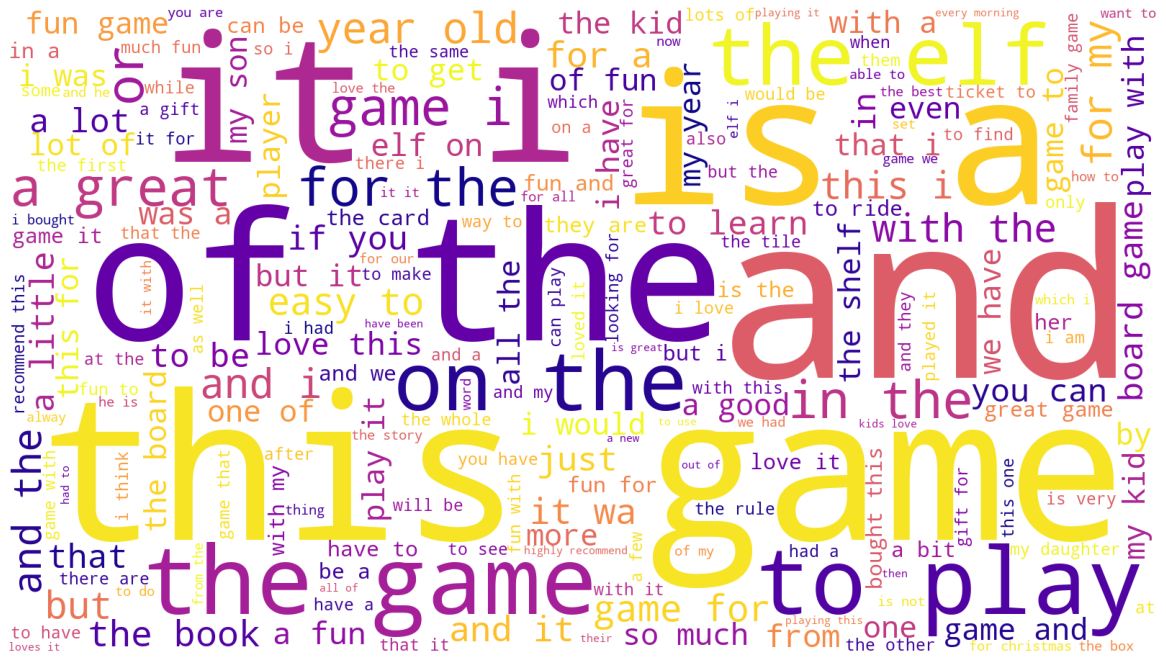

In [20]:
# Plot the WordCloud image
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

The stop words are dominating the WordCloud and making it hard to identify the context related words of high frequency and high relevance. 

In [21]:
# Remove stop words

In [22]:
!pip install nltk

In [23]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Filter out any warning messages
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Tokenize the words
review['tokens'] = review['reviewText'].apply(word_tokenize)
# Preview the result
review['tokens'].head()

0    [nice, art, nice, printing, why, two, panels, ...
1    [amazing, buy, bought, it, as, a, gift, for, o...
2    [as, my, review, of, gf9s, previous, screens, ...
3                                    [grandson, loves]
4                       [came, in, perfect, condition]
Name: tokens, dtype: object

In [26]:
# Define an empty list of tokens
all_tokens = []
for i in range(review.shape[0]):
    # Add each token to the list
    all_tokens = all_tokens + review['tokens'][i]

In [27]:
from nltk.probability import FreqDist
# Calculate the frequency distribution
fdist = FreqDist (all_tokens)
fdist

FreqDist({'the': 22707, 'to': 15650, 'and': 15340, 'a': 13332, 'it': 11967, 'game': 9758, 'i': 9639, 'this': 9421, 'is': 8665, 'for': 8368, ...})

In [28]:
tokens1 = [word for word in all_tokens if word.isalnum()]

In [29]:
# Download the stop word list
nltk.download('stopwords')
from nltk.corpus import stopwords
# Create a set of English stop words
english_stopwords = set(stopwords.words('english'))
# Create a filtered list of tokens without stop words
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
# Define an empty string variable
tokens2_string = ''
for value in tokens2:
    # Add each filtered token word to the string
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Create a WordCloud object - using tokens2
word_cloud_new = WordCloud (width = 1600, height = 900,
                background_color = 'white',
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(tokens2_string)

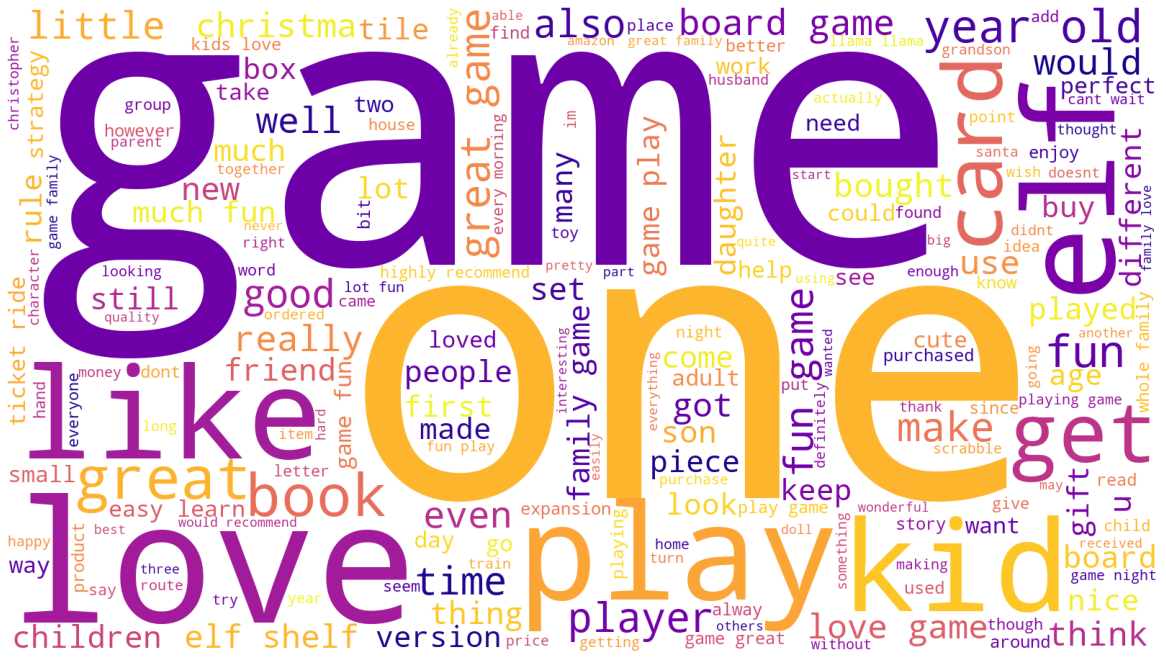

In [31]:
# Plot the WordCloud image - using tokens2
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud_new)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [32]:
# Calculate the frequency distribution
fdist_new = FreqDist (tokens2)
fdist_new

FreqDist({'game': 9758, 'fun': 4426, 'great': 3699, 'play': 3168, 'love': 2729, 'elf': 2602, 'family': 2407, 'one': 2151, 'kids': 2051, 'year': 1655, ...})

In [33]:
# Import the Counter class
from collections import Counter
# Generate a Dataframe from Counter
counts = pd.DataFrame(Counter(tokens2).most_common(20),
                    columns=['Words', 'Frequency']).set_index('Words')
# Display the result
counts

,Frequency
Words,
game,9758
fun,4426
great,3699
play,3168
love,2729
elf,2602
family,2407
one,2151
kids,2051


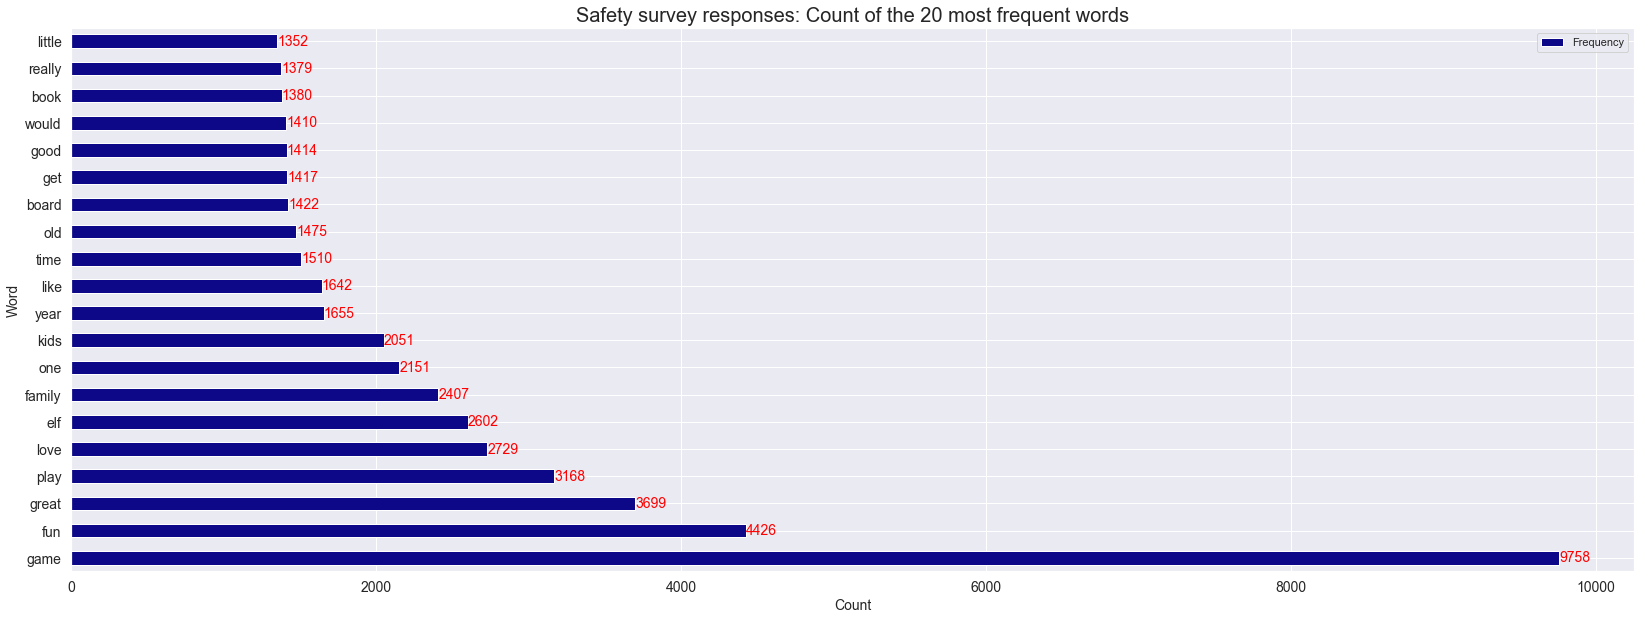

In [34]:
# Set the plot type
ax = counts.plot(kind='barh', figsize=(28,10), fontsize=14, colormap='plasma')
# Set the labels
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Word', fontsize=14)
ax.set_title('Safety survey responses: Count of the 20 most frequent words', fontsize=20)
# Draw the bar labels
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()),2)), fontsize=14, color='red')


Number of positive words are significantly high when we check the 20 most frequent words: 'fun', 'great', 'love', 'like', 'good'.
Books are highly mentioned as well as board & games (a further study can be conducted to check whether the biagram word 'board game' is among the most frequents). However, we know nothing about the sentiments towards these three words at this point.

In [35]:
# Estimate sentiment in comments with the TextBlob library

In [36]:
# Sentiment polarity scores are assigned on a range, 
# where -1 is the lowest negative sentiment, and +1 is the highest possible positive sentiment 
# Subjectivity ranges from 0 to 1, 
# where 0 means fact-based and objective while 1 means opinion-based and subjective

In [37]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

In [38]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
review['polarity'] = review['reviewText'].apply(generate_polarity)

# [3] Preview the result.
review['polarity'].head()

0    0.116640
1    0.578788
2   -0.316667
3    0.000000
4    1.000000
Name: polarity, dtype: float64

In [39]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
review['subjectivity'] = review['reviewText'].apply(generate_subjectivity)

# Preview the result.
review['subjectivity'].head()


0    0.430435
1    0.784848
2    0.316667
3    0.000000
4    1.000000
Name: subjectivity, dtype: float64

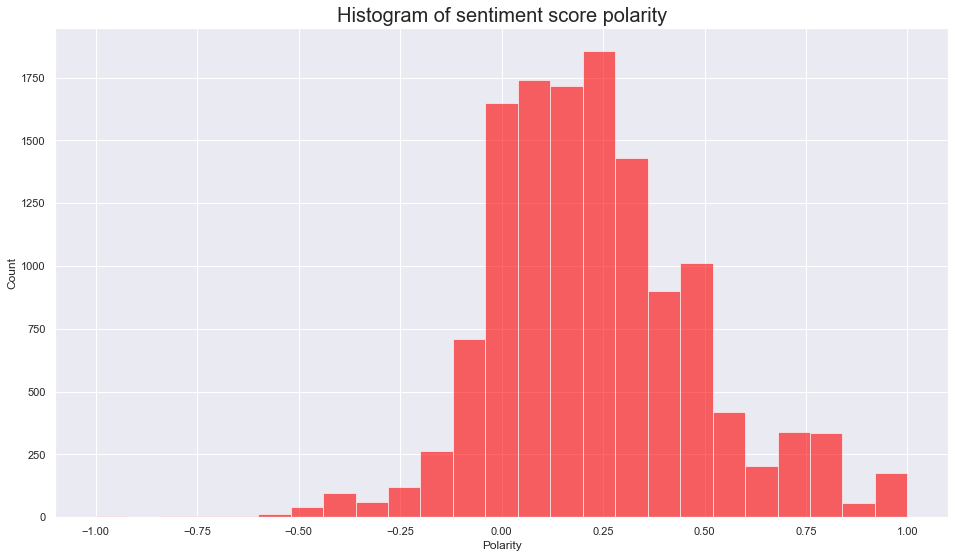

In [40]:
# Visualise sentiment polarity scores on a histogram

# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();


This plot shows us that most comments sit on the right hand side of neutral point, expressing a positive sentiment. This result is inline with the WordCloud results that have proved that there are a few positive words amongst the most frequent words. 

In [41]:
# Extract contextualised comments - the top positive sentiments

# Create a DataFrame
positive_sentiment = review.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns
positive_sentiment = positive_sentiment[['reviewerID', 'overall', 'reviewText', 'summary', 'polarity', 'subjectivity']]

# [3] Adjust the column width
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewerID,overall,reviewText,summary,polarity,subjectivity
4,A2UKOWP9ICU416,5,came in perfect condition,Five Stars,1.000000,1.000000
140,A9V7MUGGFFT7R,5,awesome book,Five Stars,1.000000,1.000000
167,A2D0AVXUJVHK1T,5,awesome gift,Five Stars,1.000000,1.000000
444,A273OOTSQQP8ID,5,excellent activity for teaching selfmanagement skills,Five Stars,1.000000,1.000000
471,A3GYWP2LZYRDLI,5,perfect just what i ordered,Five Stars,1.000000,1.000000
533,A1K1J2TG88SOH8,5,wonderful product,Five Stars,1.000000,1.000000
549,A2MW38KK7OMHBX,5,delightful product,Five Stars,1.000000,1.000000
561,A1FWWIJKFY48O,5,wonderful for my grandson to learn the resurrection story,Five Stars,1.000000,1.000000
717,A1ZSF3GAJMDLIJ,5,perfect,Aquire game,1.000000,1.000000
831,A32YPU6CNW8U33,5,awesome,Five Stars,1.000000,1.000000


In [42]:
positive_sentiment.to_csv(r'C:\Users\murat\LSE_CA\positive_sentiment.csv', index=False)

In [43]:
# Extract contextualised comments - the bottom negative sentiments

# Create a DataFrame.
negative_sentiment = review.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewerID', 'overall', 'reviewText', 'summary', 'polarity', 'subjectivity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewerID,overall,reviewText,summary,polarity,subjectivity
180,A3SCMMOUFRA9VK,1,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM ...,-1.000000,1.000000
1802,A28APXX53Y3OBG,1,kids did not like it thought it was boring,Not so much fun,-1.000000,1.000000
2899,A29ZPOASXZI493,1,some of the suggestions are disgusting,One Star,-1.000000,1.000000
7365,A1NA67C1C1ESRB,1,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,Not What Was Advertised,-1.000000,1.000000
7045,A3S8TI3M8BCBRA,3,was the elf on the shelf but it didnt have the dvd i was very disappointed,Three Stars,-0.975000,0.975000
8483,A35OX0453C1M70,1,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,Poor quality. Falling apart in multiple places.,-0.975000,0.975000
8144,A3A522DVPJNI4D,2,cliche and stupid i should not drink and amazon,Hahaha. Ho Ho Ho.,-0.800000,1.000000
8256,AUBU47RORRSMB,1,just stupid,One Star,-0.800000,1.000000
155,AWUPAM7C4GTWZ,1,incomplete kit very disappointing,INCOMPLETE KIT!,-0.780000,0.910000
12488,A2DRLFCLO4WWBY,4,i like this product for my daughter she is into the bad kitty book collection so it was an added bonus,Good Kitty,-0.700000,0.666667


In [44]:
negative_sentiment.to_csv(r'C:\Users\murat\LSE_CA\negative_sentiment.csv', index=False)

In [45]:
# Generate a document-term matrix in order to extract positive features from written text

In [46]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(positive_sentiment['reviewText'])

In [47]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:20]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Review '+str(i) for i in range(1, 21)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))


           Review 1  Review 2  Review 3  Review 4  Review 5  Review 6  \
awesome           0         1         1         0         0         0   
perfect           1         0         0         0         1         0   
product           0         0         0         0         0         1   
best              0         0         0         0         0         0   
grandson          0         0         0         0         0         0   
set               0         0         0         0         0         0   
wonderful         0         0         0         0         0         1   
excellent         0         0         0         1         0         0   
toy               0         0         0         0         0         0   
ways              0         0         0         0         0         0   

           Review 7  Review 8  Review 9  Review 10  Review 11  Review 12  \
awesome           0         0         0          1          1          0   
perfect           0         0         1     

<AxesSubplot:>

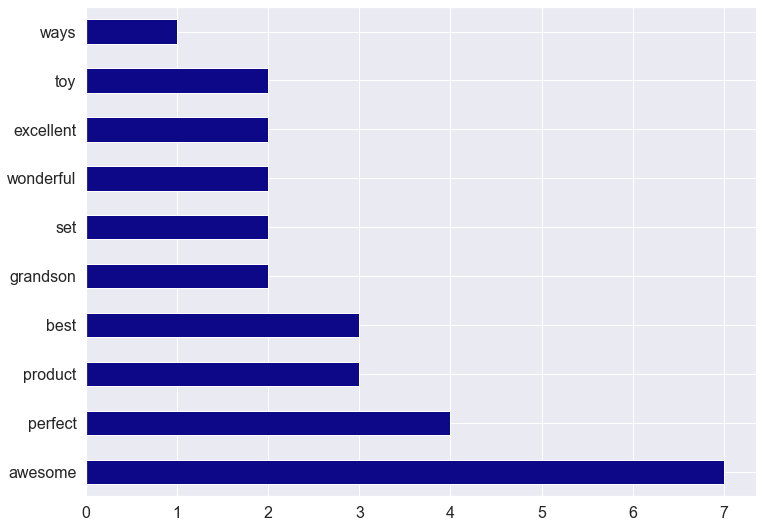

In [48]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

What might the positive popular words be telling us? 
* about products: toys and sets are popular
* about customers: grandparents prefer to buy the products for boys (grandsons)

In [49]:
# Generate a document-term matrix in order to extract negative features from written text

In [50]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(negative_sentiment['reviewText'])

In [51]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:20]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Review '+str(i) for i in range(1, 21)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Review 1  Review 2  Review 3  Review 4  Review 5  Review 6  \
book                 0         0         0         2         0         0   
like                 0         1         0         0         0         0   
disappointed         0         0         0         0         1         1   
boring               1         1         0         0         0         0   
did                  1         1         0         1         0         0   
elf                  0         0         0         1         1         0   
game                 0         0         0         0         0         0   
box                  0         0         0         0         0         1   
horrible             0         0         0         0         0         0   
stupid               0         0         0         0         0         0   

              Review 7  Review 8  Review 9  Review 10  Review 11  Review 12  \
book                 0         0         0          1          0          0   
like 

<AxesSubplot:>

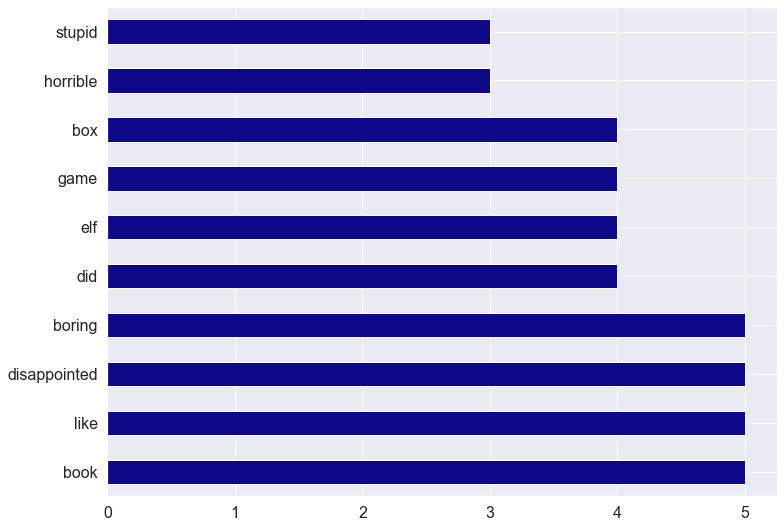

In [52]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

When we check the WordCloud we see that the words 'books' and 'board' are among the most frequent. However WordCloud does not give any hints about the sentiment. We see in this graph that 'books' and 'box' are among the negative popular word.

What might the negative popular words be telling us? 
* about products: books and box games (box game is a synonym for board game) are not as satisfactory and interesting

or

* the boxes of the products (ie packaging) are causing disappointment 
